# Deep Neural Network [Keras]
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)
- Notebook: [neural_network_deep_Keras.ipynb](https://github.com/diegoinacio/machine-learning-notebooks/blob/master/Deep-Learning-Models/neural_network_deep_Keras.ipynb)
---
Implementation of *Deep Neural Network* using Keras library.

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

import tensorflow as tf

In [2]:
plt.rcParams['figure.figsize'] = (16, 8)

In [3]:
n1, n2 = 128, 128
# Read Image
x = Image.open('sourceimages/mandril.png')
# Rescale image to a lower resolution
x = x.resize((n1, n2), Image.ANTIALIAS)
x = np.asarray(x)/255
n1, n2, c = x.shape

### split channels ###
r, g, b = x[:,:,0], x[:,:,1], x[:,:,2]

In [4]:
# Transform data and produce X_train
Y_train = np.array([r.ravel(), g.ravel(), b.ravel()]).T
t, s = np.mgrid[0:n1, 0:n2]
s = (s - s.mean())/s.std()
t = (t - t.mean())/t.std()
# X_train is the normalized spatial coordinates
X_train = np.array([s.ravel(), t.ravel()], dtype=np.float32).T

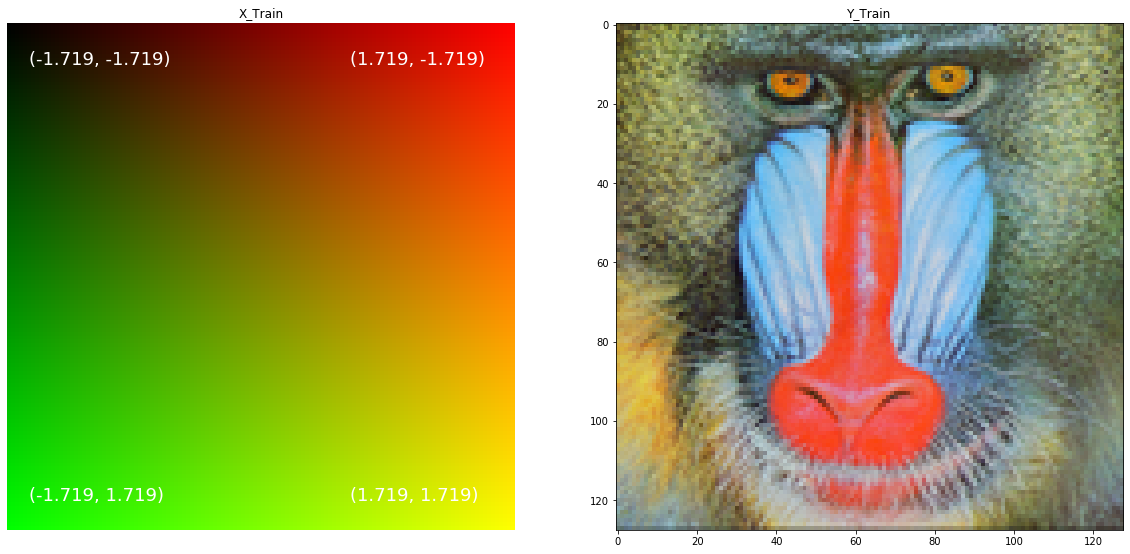

In [5]:
fig, [axA, axB] = plt.subplots(1, 2, figsize=(20, 10))

st = np.stack([s, t, s*0], axis=2)
st = (st - st.min())/(st.max() - st.min())
st[:,:,2] = 0; axA.imshow(st); axA.axis('off')
axA.text(5, 10, f'({s.min():.3f}, {t.min():.3f})', color='white', size=18)
axA.text(86, 10, f'({s.max():.3f}, {t.min():.3f})', color='white', size=18)
axA.text(5, 120, f'({s.min():.3f}, {t.max():.3f})', color='white', size=18)
axA.text(86, 120, f'({s.max():.3f}, {t.max():.3f})', color='white', size=18)
axA.set_title('X_Train')

axB.imshow(x)
axB.set_title('Y_Train')

plt.show()

In [6]:
# Produce X_test to another scale
# Upscale the image approximation
N1 = N2 = 512
t, s = np.mgrid[0:N1, 0:N2]
s = (s - s.mean())/s.std()
t = (t - t.mean())/t.std()
X_test = np.array([s.ravel(), t.ravel()], dtype=np.float32).T

print('X_train:', X_train.shape)
print('Y_train:', Y_train.shape)
print('X_test:', X_test.shape)

X_train: (16384, 2)
Y_train: (16384, 3)
X_test: (262144, 2)


## Deep Neural Network
---
![perceptron](sourceimages/neural_network_deep.png "Deep Neural Network")

In [7]:
EPOCHS = 100  # epochs

# List of number of neurons for each hidden layer
NEURONS = [32, 64, 128, 256, 512, 1024]

# model 
# Input (2): x and y coordinates
# Output (3): RGB
model = tf.keras.Sequential([
    tf.keras.layers.Input(2),
    *[tf.keras.layers.Dense(n, activation='relu') for n in NEURONS],
    tf.keras.layers.Dense(3, activation='sigmoid')
])

model.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics=['accuracy']
)

# loss and accuracy storage
loss_plot = []; accA_plot = []

for epoch in range(EPOCHS + 1):
    model.fit(X_train, Y_train, epochs=2, verbose=0)
    loss_plot += [e*100 for e in model.history.history['loss']]
    accA_plot += [e*100 for e in model.history.history['accuracy']]
    if (not epoch % 10) and (epoch != 0):
        print(f'epoch: {epoch:04d} | loss: {loss_plot[-1]:.3f} | accuracy: {accA_plot[-1]:06.2f} %')

epoch: 0010 | loss: 0.603 | accuracy: 085.70 %
epoch: 0020 | loss: 0.540 | accuracy: 086.45 %
epoch: 0030 | loss: 0.473 | accuracy: 087.25 %
epoch: 0040 | loss: 0.442 | accuracy: 087.32 %
epoch: 0050 | loss: 0.402 | accuracy: 087.67 %
epoch: 0060 | loss: 0.394 | accuracy: 087.71 %
epoch: 0070 | loss: 0.383 | accuracy: 087.85 %
epoch: 0080 | loss: 0.371 | accuracy: 088.18 %
epoch: 0090 | loss: 0.349 | accuracy: 088.29 %
epoch: 0100 | loss: 0.335 | accuracy: 088.45 %


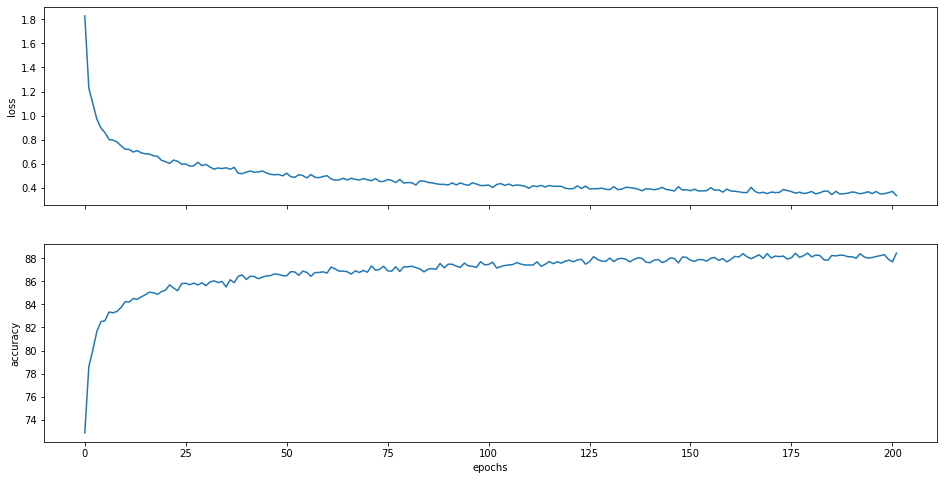

In [8]:
fig, [axA, axB] = plt.subplots(2, 1, sharex=True)

axA.plot(loss_plot)
axA.set_ylabel('loss')
axB.plot(accA_plot)
axB.set_ylabel('accuracy')

plt.xlabel('epochs')

plt.show()

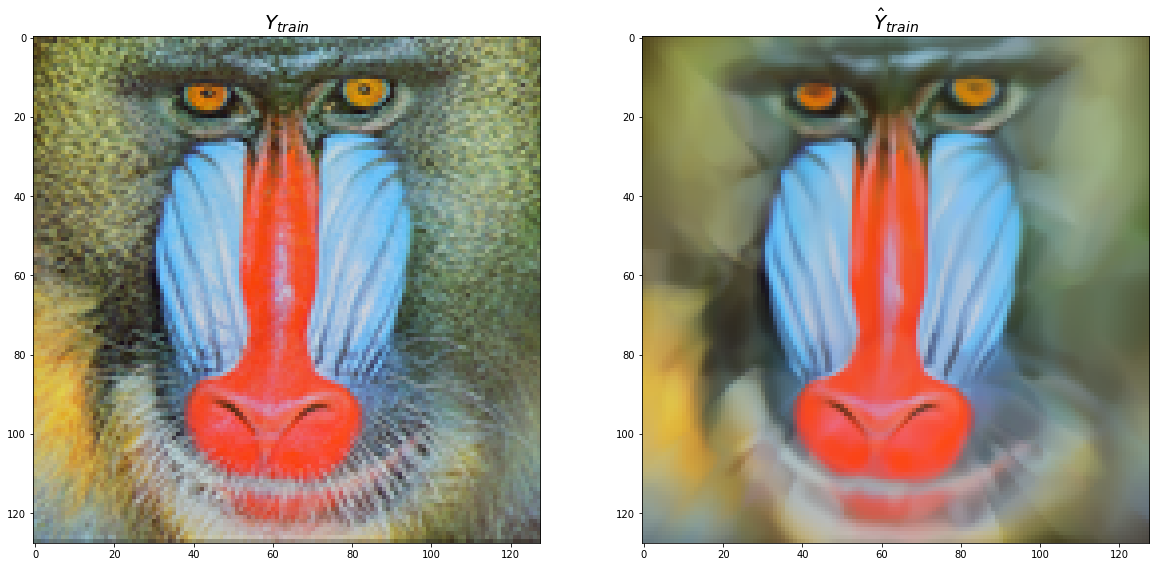

In [9]:
fig, [axA, axB] = plt.subplots(1, 2, figsize=(20, 10))

axA.imshow(x)
axA.set_title(r'$Y_{train}$', size=20)
# Predict using X_train (128x128x3)
Y_predA = model.predict(X_train)
Y_predA = Y_predA.reshape(n1, n2, c)
axB.imshow(Y_predA)
axB.set_title(r'$\hat{Y}_{train}$', size=20)

plt.show()

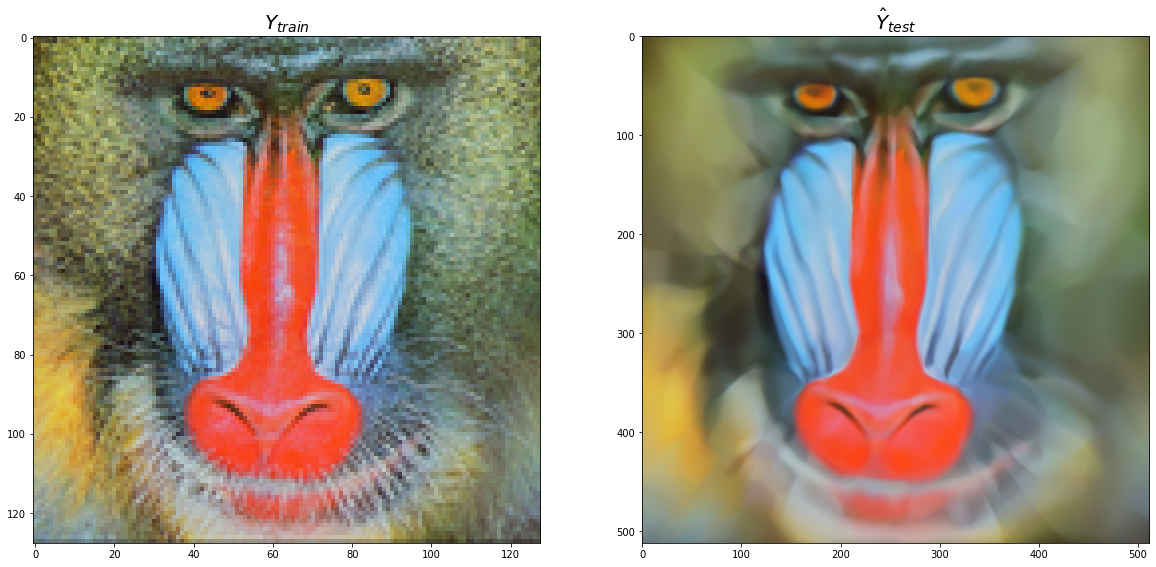

In [10]:
fig, [axA, axB] = plt.subplots(1, 2, figsize=(20, 10))

axA.imshow(x)
axA.set_title(r'$Y_{train}$', size=20)
# Predict using X_test (512x512x3)
Y_predB = model.predict(X_test)
Y_predB = Y_predB.reshape(N1, N2, c)
axB.imshow(Y_predB)
axB.set_title(r'$\hat{Y}_{test}$', size=20)

plt.show()